In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt

# to limit the printout
%precision 4
np.set_printoptions(suppress=True)

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


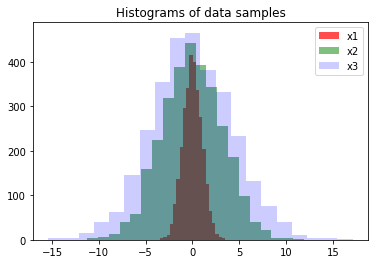

Data Matrix (Variables,Samples): (3, 3000)
Eigenvectors of Covariance matrix:
 [[-0.1162 -0.8165  0.5655]
 [-0.5765 -0.4082 -0.7078]
 [-0.8088  0.4082  0.4233]]
U matrix, with SVD:
 [[-0.1161  0.5656 -0.8165]
 [-0.5765 -0.7078 -0.4082]
 [-0.8088  0.4233  0.4082]]
Eigenvalues of Covariance matrix:
 [27.592  -0.      2.0696]
Eigenvalues with SVD:
 [27.6     2.0699  0.    ]
Variability percentage of principal component: 93.02261073617295


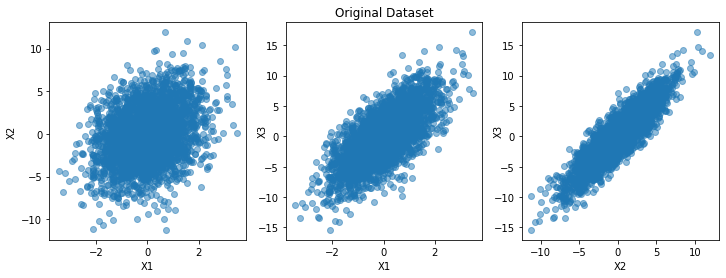

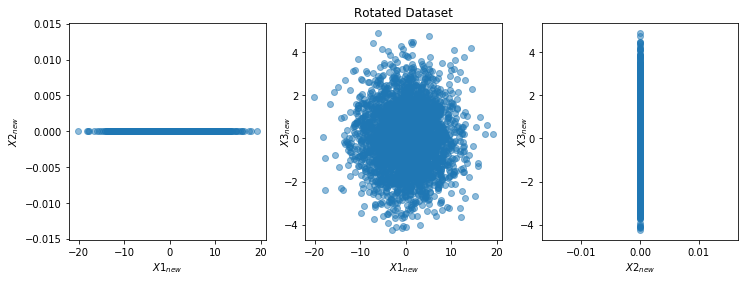

In [2]:
#generate a Dataset with 3 features
N=3000 #length of dataset
np.random.seed(2012266)

x1=np.random.normal(0,1,N)
x2=x1+np.random.normal(0,3,N)
x3=2*x1+x2

#plot the distributions of dataset
plt.figure(1)
plt.title("Histograms of data samples")
plt.hist(x1,color='red',bins=20,alpha=0.7)
plt.hist(x2,color='green',bins=20,alpha=0.5)
plt.hist(x3,color='blue',bins=20,alpha=0.2)
plt.legend(['x1','x2','x3'])
plt.show()

X=np.array([x1,x2,x3]) #data matrix
print("Data Matrix (Variables,Samples):",np.shape(X))

#find eigenvectors and eigenvalues of covariance matrix
C=np.cov(X)
#print("Covariance matrix:",C.shape)

l,V=la.eig(C)
#print("Eigenvalues of C:",np.shape(l))
#print("Eigenvectors of C:",np.shape(V))

#eigen decomposition using SVD
U, spectrum, Vt = la.svd(X)

#check: the two procedures yield to  the same result
print("Eigenvectors of Covariance matrix:\n",V)
print("U matrix, with SVD:\n",U)

print("Eigenvalues of Covariance matrix:\n",np.real_if_close(l))
print("Eigenvalues with SVD:\n",(spectrum**2)/(N-1))

#What percent of the total dataset's variability is explained by the principal components?
Lambda=np.diag(np.real_if_close(l))
print("Variability percentage of principal component:", Lambda[0,0]*100/Lambda.trace())


#Redefine the data in the basis yielded by the PCA procedure
X_rotated = np.dot(V.T,X)

#Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
X_reduced=X_rotated[0]


#ORIGINAL COORDINATES
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax1.scatter(X[0],X[1],alpha=0.5)
ax1.set_ylabel('X2')
ax1.set_xlabel('X1')

ax2.scatter(X[0],X[2],alpha=0.5)
ax2.set_ylabel('X3',labelpad=-10)
ax2.set_xlabel('X1')
ax2.title.set_text("Original Dataset")

ax3.scatter(X[1],X[2],alpha=0.5)
ax3.set_ylabel('X3',labelpad=-10)
ax3.set_xlabel('X2')

#NEW COORDINATES
fig,(ax4,ax5,ax6)=plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax4.scatter(X_rotated[0],X_rotated[1],alpha=0.5)
ax4.set_ylabel('$X2_{new}$')
ax4.set_xlabel('$X1_{new}$')

ax5.scatter(X_rotated[0],X_rotated[2],alpha=0.5)
ax5.set_ylabel('$X3_{new}$',labelpad=-10)
ax5.set_xlabel('$X1_{new}$')
ax5.title.set_text("Rotated Dataset")

ax6.scatter(X_rotated[1],X_rotated[2],alpha=0.5)
ax6.set_ylabel('$X3_{new}$',labelpad=-10)
ax6.set_xlabel('$X2_{new}$')

plt.show()

COMMENTS:

The eigenvalues of the covariance matrix are [27.6,2.06,0]: the first (main) component alone brings along the $93\%$ of the variability of the system. Moreover, one eigenvalue of the covariance matrix is zero, therefore the cluster of data in three dimensions is disposed along a plane, as one can see from the graphics in the rotated reference frame. In order to reduce the dimensionality of the system, one can choose either to analyze a 1-D system made of the first component alone, taking the $93\%$ of the variability of the system, or to analyze a 2-D system by dropping the component with $0$ eigenvalue and keeping the $100\%$ of the system information. The latter seems the best solution, providing a reduction of dimensionality and mantaining all the informations stored in the data.

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [3]:
#original dataset
X=[x1,x2,x3] 

#uncorrelated random noise
X_noise=np.zeros((10,N))
np.random.seed(2012266)
for i in range(10):X_noise[i]=np.random.normal(0,0.08,N) 
    
#add noise to dataset
X=np.concatenate((X,X_noise))
print("New Dataset (Variables,Samples):",X.shape)

#eigenvalues of covariance matrix
C=np.cov(X)
#print("Covariance matrix:",np.shape(C))

l,V=la.eig(C)
#print("Eigenvalues:",np.shape(l))
#print("Eigenvectors:",np.shape(V))

#percentage of variability of principal components
Lambda=np.diag(np.real_if_close(l))
print("Eigenvalues:",np.real_if_close(l))
print("Percentage of variability due to principal components:",(Lambda[0,0]+Lambda[1,1])*100/Lambda.trace())

#rotate the dataset
X_rotated = np.dot(V.T,X)

#reduce the dataset
X_reduced=X_rotated[0:2]
print("Reduced Dataset:",X_reduced.shape)

New Dataset (Variables,Samples): (13, 3000)
Eigenvalues: [27.5986  2.0763  0.007   0.0059  0.0068  0.0061  0.0062  0.0063  0.0066
  0.0065  0.     -0.      0.    ]
Percentage of variability due to principal components: 99.82738463173443
Reduced Dataset: (2, 3000)


COMMENTS:

As in the previous exercise, the main variability is brought by the first two eigenvalues of the covariance matrix. In this case, reducing the dataset to a 2-D system means to keep the $99.8\%$ of the variability of the system. This examples shows that PCA is a useful tool to get rid of random noise; the added noise variables don't bring any fundamental information to analyze the system, so they can easily be dropped out.

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


Motion matrix: (3, 1257)


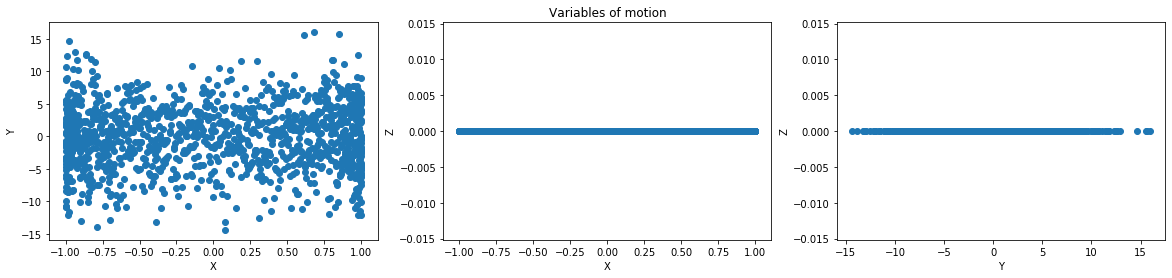

Number of directions: 7
Data Matrix: (7, 1257)
Covariance matrix: (7, 7)
Eigenvalues of covariance matrix: [48.2665  0.      0.9989  0.      0.     -0.      0.    ]
V matrix: (7, 7)
Percentage of variability: 0.9797245865692373


In [4]:
from math import pi
import seaborn as sns

#oscillating spring
t=np.arange(0,2*pi,0.005)
x=np.sin(t) #uniformly distributed

#random noise on y axis
y=np.random.normal(loc=0,scale=5,size=len(x)) #normally distributed

#no motion along z axis
z=np.zeros(len(y))

#create motion matrix
motion=np.array([x,y,z])
print("Motion matrix:",motion.shape)

#plot projections of motion variables
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,4))
ax1.scatter(motion[0],motion[1])
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

ax2.set_title("Variables of motion")
ax2.scatter(motion[0],motion[2])
ax2.set_xlabel("X")
ax2.set_ylabel("Z")

ax3.scatter(motion[1],motion[2])
ax3.set_xlabel("Y")
ax3.set_ylabel("Z")
plt.show()

###rotate to obtain projection on n-th direction

#arrays of angles
theta=np.array([pi/4,5*pi/4,3*pi/4,-pi/4,0,pi/2,0])
phi=np.array([pi/4,pi/4,-pi/4,-pi/4,0,0,pi/2])
print("Number of directions:",len(theta))

#function of directions, returns (3,) dim array
def direction(theta,phi):
    x=np.cos(phi)*np.cos(theta)
    y=np.cos(phi)*np.sin(theta)
    z=np.sin(phi)
    result=np.array([x,y,z])
    return result

#create dataset
data=np.zeros((len(theta),len(t)))
print("Data Matrix:",data.shape)

i=0
for t,p in zip(theta,phi):
    data[i]=np.dot(direction(t,p).T,motion)
    i+=1

#print(data)

#eigenvalues of covariance matrix
C=np.cov(data)
print("Covariance matrix:",C.shape)

l,V=la.eig(C)
print("Eigenvalues of covariance matrix:",np.real_if_close(l))
print("V matrix:",V.shape)

#percentage of variability
Lambda=np.diag(np.real_if_close(l))
print("Percentage of variability:",Lambda[0,0]/Lambda.trace())

#rotate dataset
data_rotated=np.dot(V.T,data)

#reduce dimension
new_data=data_rotated[0]


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [5]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

In [6]:
#load the dataset
data=pd.read_csv("Data/magic04.data")
print("Data:",data.shape)

#eig of covariance matrix
C=pd.DataFrame.cov(data)
#print("C:",C.shape)

l,V=la.eig(C)
#print("l:",l.shape)
#print("V:",V.shape)
print(np.real_if_close(l))


#percentage of variability
Lambda=np.diag(np.real_if_close(l))

print("Percentage of variability 2-D:",(Lambda[0,0]+Lambda[1,1])*100/Lambda.trace())
print("Percentage of variability 3-D:",(Lambda[0,0]+Lambda[1,1]+Lambda[2,2])*100/Lambda.trace())
print("Percentage of variability 4-D:",(Lambda[0,0]+Lambda[1,1]+Lambda[2,2]+Lambda[3,3])*100/Lambda.trace())

#try to keep only the first two components

#rotate the dataset
X_rotated=np.dot(V.T,data.T[0:10])

#reduce the dataset
X_reduced=X_rotated[0:2]
print(X_reduced.shape)

#plt.figure(1)
#plt.scatter(X_reduced[0],X_reduced[1],alpha=0.5)
#plt.show()

Data: (19019, 11)
[6579.4071 3854.0614 2016.4813 1326.8187  610.2186  433.6186  117.336
    0.0864    0.0107    0.0004]
Percentage of variability 2-D: 69.84496728861288
Percentage of variability 3-D: 83.34393637517738
Percentage of variability 4-D: 92.22608391284734
(2, 19019)


COMMENTS:

In this case, it is clear that one can easily drop out the last three components of the rotated dataset, since they don't bring along a high percentage of informations. After doing this, one is still left with a lot of dimensions to deal with. Of course, the more variables you take into account, the less information you lose in performing the PCA, and the more complex your analysis will be. I printed the 2,3,4 dimension cases and the percentage of variability they convey, anyway the most important variables are those representing the axis of the ellipse in the camera plane.